In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from pathlib import Path

json_file = Path('prod_snapshot/schemes-prod-firestore-structure.json')
output_dir = Path('figures')

In [4]:
with open(json_file, 'rb') as f:
    data = json.load(f)

    schemes = data['schemes']['documents']
    user_queries = data['userQuery']['documents']

In [7]:
from collections import Counter

scheme_type = Counter()
scheme_count = Counter()
agency_count = Counter()

def get_keys(new: bool) -> tuple[str, str, str]:
    return ('scheme', 'scheme_type', 'agency') if new else ('Scheme', 'Scheme Type', 'Agency')

for query in user_queries:
    for scheme in query['data']['schemes_response']:
        scheme_name_key, scheme_type_key, scheme_agency_key = get_keys('scheme' in scheme)
        scheme_count[scheme[scheme_name_key]] += 1

        scheme_types = [x.lower().strip() for x in scheme[scheme_type_key].split(',')] if isinstance(scheme[scheme_type_key], str) else []
        for scheme_type_cat in scheme_types:
            scheme_type[scheme_type_cat] += 1

        agency_count[scheme[scheme_agency_key]] += 1

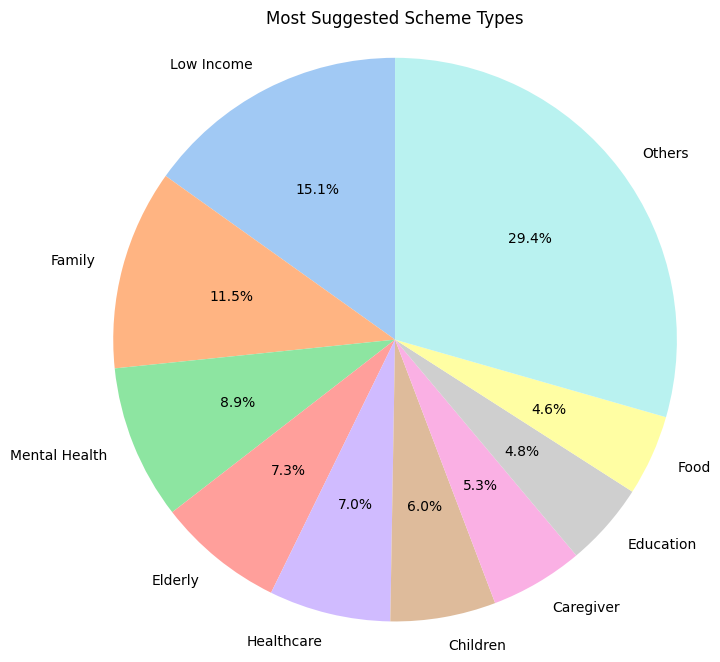

In [8]:
TOP_N = 9

sorted_cats = sorted(scheme_type.items(), key = lambda x: x[1], reverse=True)

topn = sorted_cats[:TOP_N]
sum_others = sum([x[1] for x in sorted_cats[TOP_N:]])

labels = [x[0].title() for x in topn] + ['Others']
sizes = [x[1] for x in topn] + [sum_others]

colors = sns.color_palette('pastel')

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Most Suggested Scheme Types')

fig_fp = output_dir / 'types_piechart.jpg'
plt.savefig(fig_fp)
plt.show()

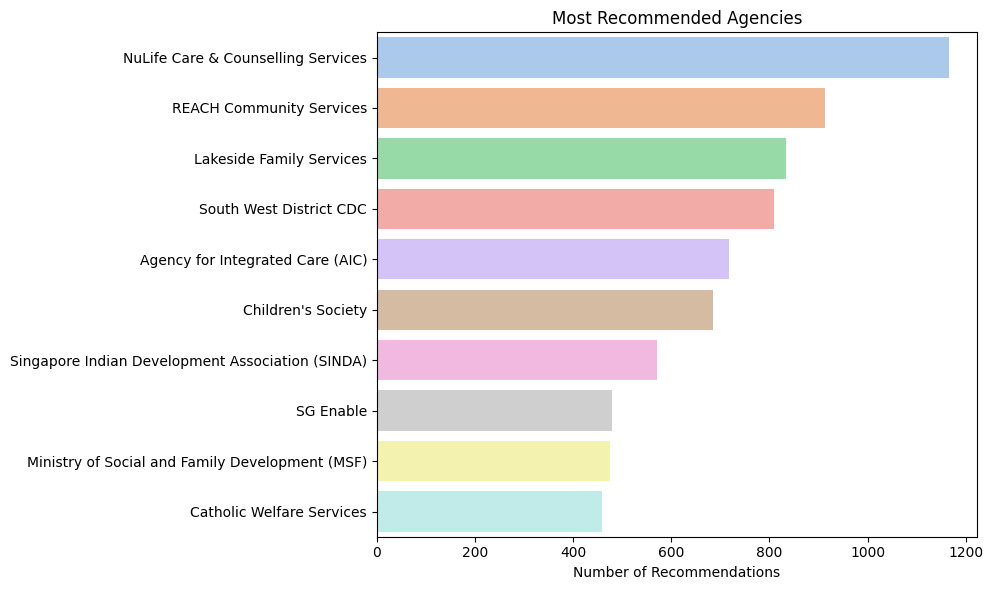

In [ ]:
TOP_N = 10

num_queries = len(user_queries)
sorted_agencies = sorted(agency_count.items(), reverse=True, key=lambda x: x[1])[:TOP_N]

barplot_data = {
    "Agencies": [x[0] for x in sorted_agencies],
    "Recommendations": [x[1] for x in sorted_agencies]
}

plt.figure(figsize=(10, 6))

ax = sns.barplot(y=barplot_data["Agencies"], x=barplot_data["Recommendations"], hue=barplot_data["Agencies"], orient='y', palette=sns.color_palette('pastel'))

ax.set_title('Most Recommended Agencies')
ax.set_xlabel('Number of Recommendations')
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(
    ax.get_yticklabels(),
    ha='right',
    fontsize=10
)

plt.tight_layout()

fig_fp = output_dir / 'agencies.jpg'
plt.savefig(fig_fp)
plt.show()

In [73]:
list(scheme_count.items())[0][1]/sum(scheme_count.values())

0.008893174756241294